In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
boss = pd.read_csv('HousingData.csv')

In [4]:
boss.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,3.023,36.2


In [5]:
boss.shape

(506, 14)

In [6]:
boss.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X = np.array(boss.iloc[:,0:13])
Y = np.array(boss['MEDV'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
Nn = KNeighborsRegressor(3)
Nn.fit(x_train, y_train)
pred_Nn = Nn.predict(x_test)

In [10]:
import sklearn
import sklearn.metrics
N_List = []
MSE_List = []
for i in range(1,50):
    model = KNeighborsRegressor(i)
    model.fit(x_train, y_train)
    pred_y = model.predict(x_test)
    mse = sklearn.metrics.mean_squared_error(y_test, pred_y, squared=False)
    N_List.append(i)
    MSE_List.append(mse)
    print("Error for k({}) = {}".format(i, mse))

Error for k(1) = 8.651988667048567
Error for k(2) = 7.714997356482135
Error for k(3) = 7.572807906625076
Error for k(4) = 7.596133885076012
Error for k(5) = 7.429386706997103
Error for k(6) = 7.703071698776484
Error for k(7) = 7.66242777514003
Error for k(8) = 7.587643472804632
Error for k(9) = 7.717076412481308
Error for k(10) = 7.757729083070366
Error for k(11) = 7.732540281715411
Error for k(12) = 7.798714035450021
Error for k(13) = 7.852507573676285
Error for k(14) = 7.89697424771447
Error for k(15) = 7.982352336899779
Error for k(16) = 8.028595615265097
Error for k(17) = 8.052943960925552
Error for k(18) = 8.103688662571882
Error for k(19) = 8.203088336670614
Error for k(20) = 8.255795781162659
Error for k(21) = 8.315592833271433
Error for k(22) = 8.337482209017866
Error for k(23) = 8.352867001846269
Error for k(24) = 8.413766816323927
Error for k(25) = 8.453579154790933
Error for k(26) = 8.472520569229307
Error for k(27) = 8.505896711148806
Error for k(28) = 8.525830320841157
Err

In [11]:
# Prepare a model for USA_Housing  as well

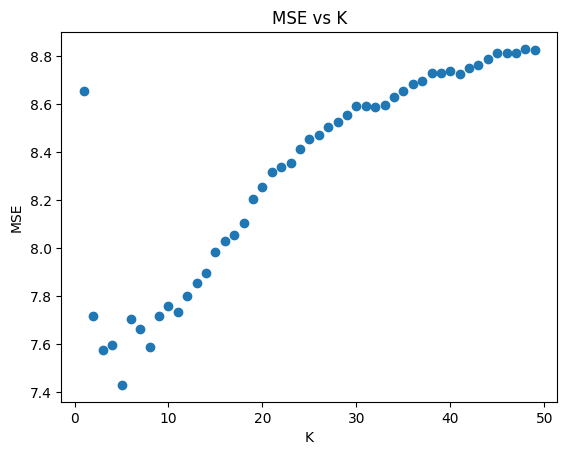

In [12]:
import matplotlib.pyplot as plt
plt.scatter(N_List, MSE_List)
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("MSE vs K")
plt.show()

In [13]:
USD = pd.read_csv("USA_Housing.csv")
USD.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
